# Testing GraphSearch Distance Concepts

## Load Libraries

In [11]:
import numpy as np
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from models.srex.ranking import Ranking
from utils.data_utils import DataUtils

## Initialize some variables

In [12]:
# Load Stop Words
stop_words_list = DataUtils.load_stopwords()

In [13]:
query                     = 'information AND retrieval'
#query                    = '"internet of things" OR iot'
#query                     'a!"#$"#"$"'
#query                     = 'query AND (expansion OR refinement)'
#query                    = '("Document Title":internet of things   OR   ("Document Title":iot  AND "Document Title":device  )  )  AND ("Abstract":security NOT  "Abstract":visual OR "Document Title":network)'
#query                    = '((( literature  OR document OR information OR data ) AND (retrieval OR retrieve)) OR (search AND engine)  )  AND  (query AND  ( expansion OR refinement OR reformulation))'
nr_search_results        = 10

ranking_weight_type      = 'linear' # it can be: 'none', 'linear' or 'inverse'
lema                     = True
stem                     = False
summarize                = 'mean'   # it can be: 'mean' or 'median'
nr_of_graph_terms        = 10
limit_distance           = 4 
include_query_terms  = False

## Calculate Ranking data structure

In [14]:
ranking = Ranking(query, nr_search_results, ranking_weight_type, stop_words_list, lema, stem)
ranking.calculate_ieee_xplore_ranking()
#ranking.calculate_article_dictionaries_list([{}])
#articles = ranking.get_ieee_xplore_ranking()
#dicts = [{"title": a.get('title', ''), "abstract": a.get('abstract', ''), "article_number": a.get('article_number', '')} for a in articles]
#import json
#print(json.dumps(dicts, indent=2))

## Generate all graphs from ranking, documents and sentences

In [15]:
ranking.generate_all_graphs(nr_of_graph_terms, limit_distance, include_query_terms, summarize)

In [16]:
for index, d in enumerate(ranking.get_documents()):
    print(f"{index+1}. TITLE: {d.get_title()} (id:{d.get_doc_id()})")
    for s in d.get_sentences():
        print(f"txt: {s.get_preprocessed_text()}")

1. TITLE: The Prediction of the High-Cost Non-Cumulative Discounted Gain and Precision Performance Metrics in Information Retrieval Evaluation (id:9497989)
txt: prediction high cost non cumulative discounted gain precision performance metric information retrieval evaluation
txt: information retrieval system play critical role meeting information need user
txt: high effectiveness expected system user make decision based retrieval result
txt: effectiveness system varies known retrieval evaluation main approach evaluating system test collection model comprises corpus document topic relevance judgment
txt: 
txt: 
txt: 
txt: 
txt: 
2. TITLE: Ontology-based information retrieval for historical documents (id:7806335)
txt: ontology based information retrieval historical document
txt: 
txt: representation improves precision recall document retrieval
txt: 
3. TITLE: Research on Content-Based Multimedia Information Retrieval (id:6086185)
txt: research content based multimedia information retrieva

In [17]:
for d in ranking.get_documents():
    print(f"doc: {d.get_title()}")
    for s in d.get_sentences():
        print(f"vecinity matrix: {s.get_vicinity_matrix()}")

doc: The Prediction of the High-Cost Non-Cumulative Discounted Gain and Precision Performance Metrics in Information Retrieval Evaluation
vecinity matrix: {'gain': {'information': [0, 0, 0, 1]}, 'precision': {'information': [0, 0, 1, 0], 'retrieval': [0, 0, 0, 1]}, 'performance': {'information': [0, 1, 0, 0], 'retrieval': [0, 0, 1, 0]}, 'metric': {'information': [1, 0, 0, 0], 'retrieval': [0, 1, 0, 0]}, 'evaluation': {'information': [0, 1, 0, 0], 'retrieval': [1, 0, 0, 0]}}
vecinity matrix: {'system': {'information': [0, 1, 0, 0], 'retrieval': [1, 0, 0, 0]}, 'play': {'information': [0, 0, 1, 1], 'retrieval': [0, 1, 0, 0]}, 'critical': {'information': [0, 0, 1, 1], 'retrieval': [0, 0, 1, 0]}, 'role': {'information': [0, 1, 0, 0], 'retrieval': [0, 0, 0, 1]}, 'meeting': {'information': [1, 0, 0, 0]}, 'need': {'information': [1, 0, 0, 0]}, 'user': {'information': [0, 1, 0, 0]}}
vecinity matrix: {'user': {'retrieval': [0, 0, 0, 1]}, 'make': {'retrieval': [0, 0, 1, 0]}, 'decision': {'retriev

In [18]:
#Show graphs from the ranking class
print(ranking.get_graph())

SUBQUERY: information AND retrieval
TERM: system ; PONDERATION: 7.7 ; DISTANCE: 2.0
TERM: based ; PONDERATION: 5.9 ; DISTANCE: 2.0
TERM: user ; PONDERATION: 5.8 ; DISTANCE: 2.8
TERM: multimedia ; PONDERATION: 4.5 ; DISTANCE: 1.8
TERM: content ; PONDERATION: 4.2 ; DISTANCE: 3.4
TERM: mobile ; PONDERATION: 3.4 ; DISTANCE: 2.1
TERM: precision ; PONDERATION: 2.6 ; DISTANCE: 2.8
TERM: document ; PONDERATION: 2.6 ; DISTANCE: 2.4
TERM: time ; PONDERATION: 2.6 ; DISTANCE: 3.3
TERM: need ; PONDERATION: 2.5 ; DISTANCE: 1.4
TERM: relevant ; PONDERATION: 2.4 ; DISTANCE: 1.0
TERM: visual ; PONDERATION: 2.4 ; DISTANCE: 2.6
TERM: result ; PONDERATION: 2.4 ; DISTANCE: 2.0
TERM: context ; PONDERATION: 2.4 ; DISTANCE: 4.0
TERM: critical ; PONDERATION: 2.3 ; DISTANCE: 3.2
TERM: feature ; PONDERATION: 2.2 ; DISTANCE: 4.0
TERM: network ; PONDERATION: 2.1 ; DISTANCE: 1.7
TERM: query ; PONDERATION: 2.1 ; DISTANCE: 2.8
TERM: expansion ; PONDERATION: 2.1 ; DISTANCE: 2.7
TERM: evaluation ; PONDERATION: 2.0 ; DI

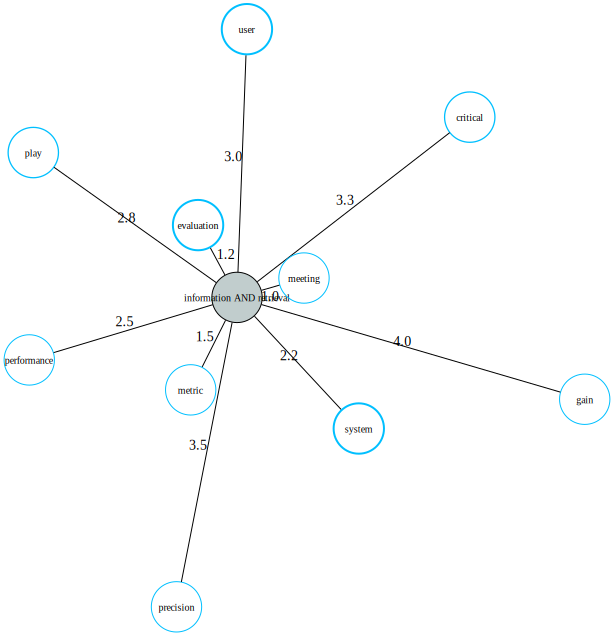

In [19]:
visual_graph1 = ranking.get_document_by_ranking_position(1).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph1

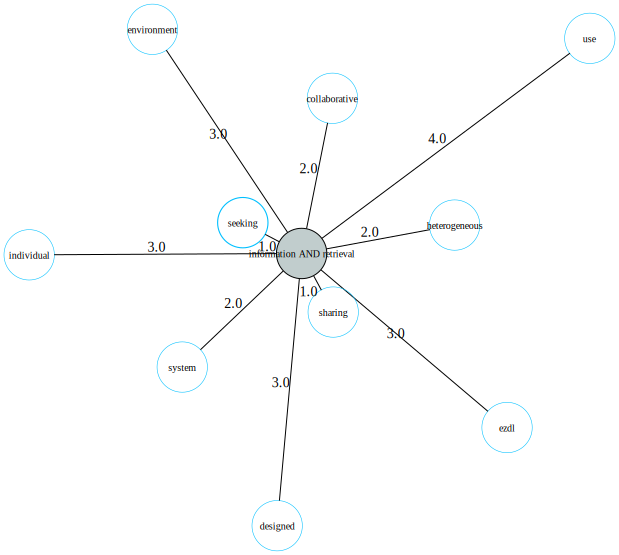

In [20]:
visual_graph2 = ranking.get_document_by_ranking_position(10).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph2

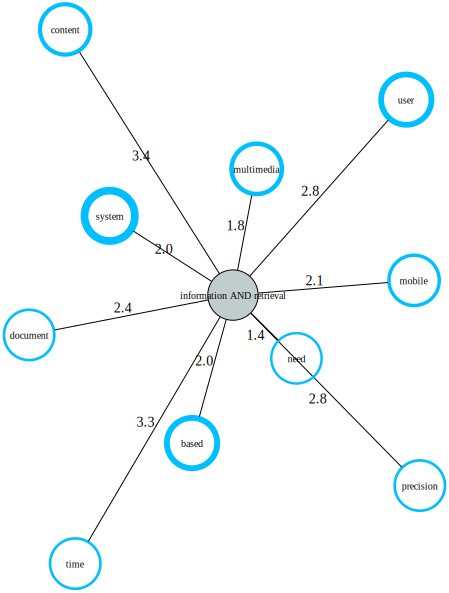

In [21]:
visual_graph = ranking.get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph

In [12]:
ranking.get_graph().get_cosine_similarity(ranking.get_document_by_ranking_position(10).get_graph())

np.float64(0.23765325016488345)

## Comparing Top 2 sentences graphs average similarities with ranking graph

In [13]:
# Top 2 sentence graphs by doc function
def get_top2_graph_sentences(doc, include_ponderation=False):
    g_user = ranking.get_graph()
    top2_graph_sentences = []
    for s in doc.get_sentences():
        if s.get_graph().get_graph_as_dict():
            top2_graph_sentences.append((s.get_position_in_doc(), g_user.get_cosine_similarity(s.get_graph(), include_ponderation)))

    if len(top2_graph_sentences) == 1:
        return ((top2_graph_sentences[0][0],top2_graph_sentences[0][0]), 
                (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(),doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph()))
    top2_graph_sentences = sorted(top2_graph_sentences, key=lambda tuple: tuple[1], reverse=True)[:2]
    # return -> ((pos_in_doc_1, pos_in_doc_2), (graph1, graph2))
    return ((top2_graph_sentences[0][0], top2_graph_sentences[1][0]), 
            (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(), doc.get_sentence_by_position_in_doc(top2_graph_sentences[1][0]).get_graph()))


# Average similarities by document function
def avg_sim_doc(g_doc_top2_sentences, include_ponderation=False):
    graph_user = ranking.get_graph()
    sim_doc_top1 = graph_user.get_cosine_similarity(g_doc_top2_sentences[0], include_ponderation)
    sim_doc_top2 = graph_user.get_cosine_similarity(g_doc_top2_sentences[1], include_ponderation)
    avg_sim_doc = (sim_doc_top1 + sim_doc_top2) / 2
    return avg_sim_doc


def print_top2_sentences_by_doc_similarity(include_ponderation: bool = False):
    g_docs_top2_sentences = []
    avg_sim_docs = []

    for index1 in range(nr_search_results):
        g_docs_top2_sentences.append(get_top2_graph_sentences(ranking.get_document_by_ranking_position(index1+1), include_ponderation))

    for index2 in range(nr_search_results):
        avg_sim_docs.append(avg_sim_doc(g_docs_top2_sentences[index2][1], include_ponderation))
        
    for index3 in range(nr_search_results):
        print(f"doc {index3+1} top 2 sentences: {g_docs_top2_sentences[index3][0]}")
        print(f"doc {index3+1} similarity: {avg_sim_docs[index3]}")
    


tple_doc1 = get_top2_graph_sentences(ranking.get_document_by_ranking_position(1))
tple_doc2 = get_top2_graph_sentences(ranking.get_document_by_ranking_position(10))
doc1_doc2_sentence_top1_union = tple_doc1[1][0].get_union_to_graph(tple_doc2[1][0])
doc1_doc2_sentence_top2_union = tple_doc1[1][1].get_union_to_graph(tple_doc2[1][1])

print(f"doc 1 top 1 sentence similarity: {tple_doc1[1][0].get_cosine_similarity(doc1_doc2_sentence_top1_union)}")
print(f"doc 10 top 1 sentence similarity: {tple_doc2[1][0].get_cosine_similarity(doc1_doc2_sentence_top1_union)}")

print(f"\ndoc 1 top 2 sentence similarity: {tple_doc1[1][1].get_cosine_similarity(doc1_doc2_sentence_top2_union)}")
print(f"doc 10 top 2 sentence similarity: {tple_doc2[1][1].get_cosine_similarity(doc1_doc2_sentence_top2_union)}")

print("\nSimilarity without include_ponderations")
print_top2_sentences_by_doc_similarity(include_ponderation=False)
     
print("\nSimilarity with include_ponderations")
print_top2_sentences_by_doc_similarity(include_ponderation=True)

doc 1 top 1 sentence similarity: 0.7677882564109569
doc 10 top 1 sentence similarity: 0.6407036704416657

doc 1 top 2 sentence similarity: 0.8258379793887158
doc 10 top 2 sentence similarity: 0.5639074674085839

Similarity without include_ponderations
doc 1 top 2 sentences: (3, 5)
doc 1 similarity: 0.2671901484591993
doc 2 top 2 sentences: (1, 0)
doc 2 similarity: 0.18293737097545307
doc 3 top 2 sentences: (5, 2)
doc 3 similarity: 0.28686247390693337
doc 4 top 2 sentences: (0, 1)
doc 4 similarity: 0.18850041758107314
doc 5 top 2 sentences: (6, 5)
doc 5 similarity: 0.1764262552375846
doc 6 top 2 sentences: (1, 2)
doc 6 similarity: 0.22080239085639541
doc 7 top 2 sentences: (1, 2)
doc 7 similarity: 0.22080239085639541
doc 8 top 2 sentences: (7, 1)
doc 8 similarity: 0.2237267851919161
doc 9 top 2 sentences: (0, 4)
doc 9 similarity: 0.19456249606428727
doc 10 top 2 sentences: (1, 0)
doc 10 similarity: 0.17776316291182237

Similarity with include_ponderations
doc 1 top 2 sentences: (3, 5)
d

## Comparing document graph similarities with ranking graph

In [14]:
def print_documents_similatity(include_ponderation: bool = False):
    for index, doc in enumerate(ranking.get_documents()):
        print(f"doc {index+1}: {ranking.get_graph().get_viewable_graph_copy().get_cosine_similarity(doc.get_graph(), include_ponderation)}")

print("Similarities by document without include_ponderations")
print_documents_similatity(include_ponderation=False)

print("\nSimilarities by document without include_ponderations")
print_documents_similatity(include_ponderation=True)

Similarities by document without include_ponderations
doc 1: 0.24946219880533368
doc 2: 0.15186862469598403
doc 3: 0.24861539155328008
doc 4: 0.06451711863117335
doc 5: 0.2015803387250087
doc 6: 0.39655194255083154
doc 7: 0.39655194255083154
doc 8: 0.310998770260553
doc 9: 0.0
doc 10: 0.16761448669467102

Similarities by document without include_ponderations
doc 1: 0.28939565471829237
doc 2: 0.17585356018780698
doc 3: 0.3249147660807939
doc 4: 0.06756265733025736
doc 5: 0.20320388496520714
doc 6: 0.3784605658591145
doc 7: 0.3784605658591145
doc 8: 0.2962004814861263
doc 9: 0.0
doc 10: 0.2354465250636165


## Generating ranking graph from Top 2 sentences by document


Similarity without include_ponderations
doc 1 top 2 sentences: (1, 0)
doc 1: 0.21042084742802364
doc 2 top 2 sentences: (1, 0)
doc 2: 0.29549981811664416
doc 3 top 2 sentences: (1, 5)
doc 3: 0.3783539060812797
doc 4 top 2 sentences: (0, 1)
doc 4: 0.10552295283987588
doc 5 top 2 sentences: (0, 1)
doc 5: 0.25393762038697576
doc 6 top 2 sentences: (1, 0)
doc 6: 0.41777927650286906
doc 7 top 2 sentences: (1, 0)
doc 7: 0.41777927650286906
doc 8 top 2 sentences: (1, 0)
doc 8: 0.25430885210781523
doc 9 top 2 sentences: (4, 0)
doc 9: 0.0
doc 10 top 2 sentences: (0, 1)
doc 10: 0.3075592530403964
ranking graph number of neighbour terms: 78

Similarity with include_ponderations
doc 1 top 2 sentences: (1, 0)
doc 1: 0.20363641098383087
doc 2 top 2 sentences: (1, 0)
doc 2: 0.287353089924967
doc 3 top 2 sentences: (1, 5)
doc 3: 0.4119100936758739
doc 4 top 2 sentences: (0, 1)
doc 4: 0.10126595620085463
doc 5 top 2 sentences: (0, 1)
doc 5: 0.24497334989056282
doc 6 top 2 sentences: (1, 0)
doc 6: 0.38

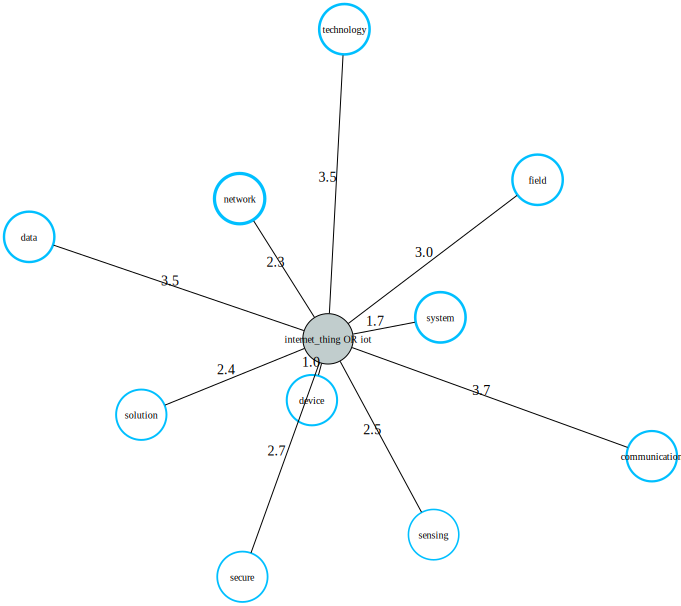

In [15]:
# Get the average similarity with all documents in the ranking, excluding its own document graphs
def get_avg_sim_with_all_sentences(doc_ranking_position: int, local_sentence_graph, include_ponderation: bool = False) -> float:
    avg_sim_values = []
    for index, doc in enumerate(ranking.get_documents()):
        if (doc_ranking_position - 1) != index:
            for s in doc.get_sentences():
                if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
                    avg_sim_values.append(local_sentence_graph.get_cosine_similarity(s.get_graph(), include_ponderation))
    return np.mean(avg_sim_values)

# Top 2 sentence graphs by doc, comparing its similarity with the rest of sentences in the ranking, and calculating the mean of all the similarities
def get_top2_graph_sentences(doc, include_ponderation: bool = False) -> tuple[tuple, tuple]:
    top2_graph_sentences = []
    # first, get -> ((pos_in_doc_1, avg_sim_1), (pos_in_doc_2, avg_sim_2), ... , (pos_in_doc_N, avg_sim_N))
    for s in doc.get_sentences():
        if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
            top2_graph_sentences.append((s.get_position_in_doc(), get_avg_sim_with_all_sentences(doc.get_ranking_position(), s.get_graph(), include_ponderation)))

    # if just one sentence, return -> ((pos_in_doc_1, pos_in_doc_1), (graph1, graph1))
    if len(top2_graph_sentences) == 1:
        return ((top2_graph_sentences[0][0], top2_graph_sentences[0][0]), 
                (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(), doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph()))
    
    top2_graph_sentences = sorted(top2_graph_sentences, key=lambda tuple: tuple[1], reverse=True)[:2]
    # return -> ((pos_in_doc_1, pos_in_doc_2), (graph1, graph2))
    return ((top2_graph_sentences[0][0], top2_graph_sentences[1][0]), 
            (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(), doc.get_sentence_by_position_in_doc(top2_graph_sentences[1][0]).get_graph()))


# Get union of trees between the top 2 sentences of a given document
def get_united_tree_from_top2_sentences(doc, g_docs_top2_sentences: tuple[tuple, tuple]):
    query_tree_sentence_1 = doc.get_sentence_by_position_in_doc(g_docs_top2_sentences[0][0]).get_query_tree()
    query_tree_sentence_2 = doc.get_sentence_by_position_in_doc(g_docs_top2_sentences[0][1]).get_query_tree()
    united_tree = query_tree_sentence_1.get_union_to_tree(query_tree_sentence_2)
    return united_tree


def print_top2_sentences_by_doc_similarity(include_ponderation: bool = False):
    g_docs_top2_sentences: list[tuple[tuple, tuple]] = []
    united_trees = []

    for index in range(nr_search_results):
        g_docs_top2_sentences.append(get_top2_graph_sentences(ranking.get_documents()[index], include_ponderation))

    for index in range(nr_search_results):
        united_trees.append(get_united_tree_from_top2_sentences(ranking.get_documents()[index], g_docs_top2_sentences[index]))
    ranking_tree = united_trees[0].get_union_of_trees(united_trees)
        
    for index, doc in enumerate(ranking.get_documents()):
        print(f"doc {index+1} top 2 sentences: {g_docs_top2_sentences[index][0]}")
        print(f"doc {index+1}: {ranking_tree.get_graph().get_viewable_graph_copy().get_cosine_similarity(united_trees[index].get_graph(), include_ponderation)}")
    
    print(f"ranking graph number of neighbour terms: {len(ranking_tree.get_graph().get_graph_as_dict())}")
    visual_graph = ranking_tree.get_graph().get_graph_viz('0.7', 'deepskyblue')
    return visual_graph
    


print("\nSimilarity without include_ponderations")
visual_graph = print_top2_sentences_by_doc_similarity(include_ponderation=False)
     
print("\nSimilarity with include_ponderations")
print_top2_sentences_by_doc_similarity(include_ponderation=True)

visual_graph

## Generating the 1st sentence graph of the ranking, as the user graph (Version 1)

(14, 1, np.float64(0.09374615909327275))


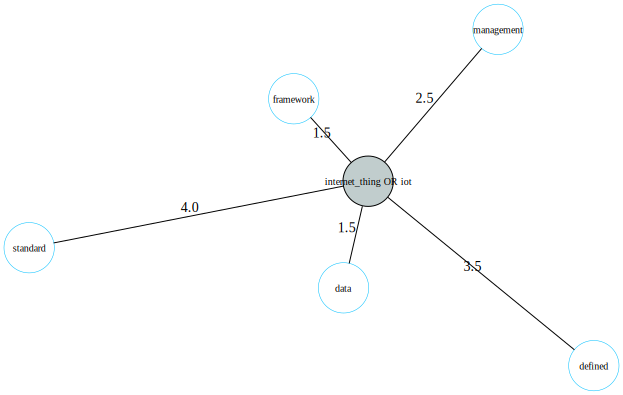

In [16]:
# Get the average similarity with all documents in the ranking, excluding its own document graphs
def get_avg_sim_with_all_sentences(doc_ranking_position: int, local_sentence_graph, include_ponderation: bool = False) -> float:
    avg_sim_values = []
    for index, doc in enumerate(ranking.get_documents()):
        if (doc_ranking_position - 1) != index:
            for s in doc.get_sentences():
                if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
                    avg_sim_values.append(local_sentence_graph.get_cosine_similarity(s.get_graph(), include_ponderation))
    return np.mean(avg_sim_values)

# Top 2 sentence graphs by doc, comparing its similarity with the rest of sentences in the ranking, and calculating the mean of all the similarities
def get_top1_similarity_sentence(document_position: int, doc, include_ponderation: bool = False) -> tuple:
    top1_graph_sentences = []
    # first, get -> ((pos_in_doc_1, avg_sim_1), (pos_in_doc_2, avg_sim_2), ... , (pos_in_doc_N, avg_sim_N))
    for s in doc.get_sentences():
        if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
            top1_graph_sentences.append((s.get_position_in_doc(), get_avg_sim_with_all_sentences(doc.get_ranking_position(), s.get_graph(), include_ponderation)))
    
    top1_graph_sentences = sorted(top1_graph_sentences, key=lambda tuple: tuple[1], reverse=True)[:1]
    # return -> (document_position, pos_in_doc_first_place, avg_sim_first_place)
    return (document_position, top1_graph_sentences[0][0], top1_graph_sentences[0][1])


def print_top2_sentences_by_doc_similarity(include_ponderation: bool = False):
    g_docs_top1_sentences: list[tuple] = []

    for index in range(nr_search_results):
        g_docs_top1_sentences.append(get_top1_similarity_sentence(index, ranking.get_documents()[index], include_ponderation))

    g_docs_top1_sentences = sorted(g_docs_top1_sentences, key=lambda tuple: tuple[2], reverse=True)[:1]
    g_docs_top1_sentences = g_docs_top1_sentences[0]
    print(g_docs_top1_sentences)
    first_graph = ranking.get_documents()[g_docs_top1_sentences[0]].get_sentences()[g_docs_top1_sentences[1]].get_graph()
    visual_graph = first_graph.get_graph_viz('0.7', 'deepskyblue')
    return visual_graph
    

visual_graph = print_top2_sentences_by_doc_similarity(include_ponderation=False)
visual_graph

## Generating the 1st sentence graph of the ranking, as the user graph (Version 2)

(0, 1, np.float64(0.04749405772704334))


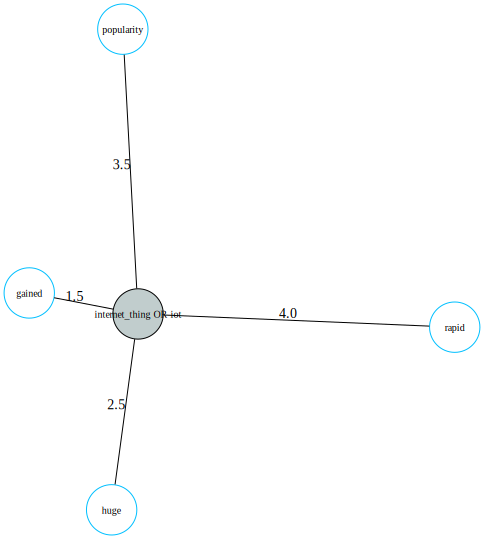

In [17]:
# Get the average similarity with all documents in the ranking, excluding its own document graphs
def get_avg_sim_with_all_sentences(doc_ranking_position: int, local_sentence_graph, include_ponderation: bool = False) -> float:
    avg_sim_values = []
    for index, doc in enumerate(ranking.get_documents()):
        if (doc_ranking_position - 1) != index:
            for s in doc.get_sentences():
                if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
                    avg_sim_values.append(local_sentence_graph.get_cosine_similarity(s.get_graph(), include_ponderation))
    return np.mean(avg_sim_values)

# Top 2 sentence graphs by doc, comparing its similarity with the rest of sentences in the ranking, and calculating the mean of all the similarities
def get_top1_similarity_sentence(document_position: int, doc, include_ponderation: bool = False) -> tuple:
    top1_graph_sentences = []
    # first, get -> ((pos_in_doc_1, avg_sim_1), (pos_in_doc_2, avg_sim_2), ... , (pos_in_doc_N, avg_sim_N))
    for s in doc.get_sentences():
        if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
            top1_graph_sentences.append((s.get_position_in_doc(), get_avg_sim_with_all_sentences(doc.get_ranking_position(), s.get_graph(), include_ponderation)))
    
    top1_graph_sentences = sorted(top1_graph_sentences, key=lambda tuple: tuple[1], reverse=True)[:1]
    # return -> (document_position, pos_in_doc_first_place, avg_sim_first_place)
    return (document_position, top1_graph_sentences[0][0], top1_graph_sentences[0][1])


def print_top2_sentences_by_doc_similarity(include_ponderation: bool = False):
    first_doc_top1_graph_sentence = get_top1_similarity_sentence(0, ranking.get_documents()[0], include_ponderation)
    print(first_doc_top1_graph_sentence)
    first_graph = ranking.get_documents()[first_doc_top1_graph_sentence[0]].get_sentences()[first_doc_top1_graph_sentence[1]].get_graph()
    visual_graph = first_graph.get_graph_viz('0.7', 'deepskyblue')
    return visual_graph
    

visual_graph = print_top2_sentences_by_doc_similarity(include_ponderation=False)
visual_graph